# **Assignment A3 (Part-B)**

---



In [25]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from statsmodels.discrete.discrete_model import Probit
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt


In [26]:
# Read in the data
df = pd.read_csv("NSSO68.csv")
df


<ipython-input-26-e985c838466c>:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("NSSO68.csv")


,slno,grp,Round_Centre,FSU_number,Round,Schedule_Number,Sample,Sector,state,State_Region,...,pickle_v,sauce_jam_v,Othrprocessed_v,Beveragestotal_v,foodtotal_v,foodtotal_q,state_1,Region,fruits_df_tt_v,fv_tot
0,1,40999999999999992652495293775872.0,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1141.492400,30.942394,GUJ,2,12.000000,154.180000
1,2,40999999999999992652495293775872.0,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,17.500000,1244.553500,29.286153,GUJ,2,333.000000,484.950000
2,3,40999999999999992652495293775872.0,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1050.315400,31.527046,GUJ,2,35.000000,214.840000
3,4,40999999999999992652495293775872.0,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,33.333333,1142.591667,27.834607,GUJ,2,168.333333,302.300000
4,5,40999999999999992652495293775872.0,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,75.000000,945.249500,27.600713,GUJ,2,15.000000,148.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101657,101658,79999999999999997087170359721984.0,1,79998,68,10,1,1,1,12,...,0.0,0.0,0.0,0.000000,544.013667,28.441750,J$K,2,0.000000,25.833333
101658,101659,79999999999999997087170359721984.0,1,79998,68,10,1,1,1,12,...,0.0,0.0,0.0,8.000000,417.616600,25.490282,J$K,2,0.000000,49.000000
101659,101660,79999999999999997087170359721984.0,1,79998,68,10,1,1,1,12,...,0.0,0.0,0.0,7.142857,378.300429,25.800107,J$K,2,0.000000,32.285714
101660,101661,79999999999999997087170359721984.0,1,79998,68,10,1,1,1,12,...,0.0,0.0,0.0,14.000000,510.023600,30.220170,J$K,2,0.000000,39.200000


In [27]:
# Create the Target variable
df['non_veg'] = np.where(df[['eggsno_q', 'fishprawn_q', 'goatmeat_q', 'beef_q', 'pork_q', 'chicken_q', 'othrbirds_q']].sum(axis=1) > 0, 1, 0)
df['non_veg']


0         1
1         1
2         1
3         1
4         1
         ..
101657    0
101658    1
101659    1
101660    0
101661    0
Name: non_veg, Length: 101662, dtype: int64

In [28]:
# Define dependent variable (y) and independent variables (X)
y = df['non_veg']
X = df[['HH_type', 'Religion', 'Social_Group', 'Regular_salary_earner', 'Possess_ration_card', 'Sex', 'Age', 'Marital_Status', 'Education', 'Meals_At_Home', 'Region', 'hhdsz', 'NIC_2008', 'NCO_2004']]
y.head()
X.head()


,HH_type,Religion,Social_Group,Regular_salary_earner,Possess_ration_card,Sex,Age,Marital_Status,Education,Meals_At_Home,Region,hhdsz,NIC_2008,NCO_2004
0,2.0,1.0,3.0,1.0,1.0,1,50,2.0,8.0,59.0,2,5,47510.0,411.0
1,2.0,3.0,9.0,1.0,1.0,2,40,3.0,12.0,56.0,2,2,85102.0,331.0
2,1.0,1.0,9.0,1.0,1.0,1,45,2.0,7.0,60.0,2,5,49219.0,121.0
3,2.0,3.0,9.0,1.0,1.0,1,75,3.0,6.0,60.0,2,3,49231.0,911.0
4,1.0,1.0,9.0,2.0,1.0,1,30,2.0,7.0,59.0,2,4,45403.0,121.0


In [29]:
# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
X_imputed

array([[2.0000e+00, 1.0000e+00, 3.0000e+00, ..., 5.0000e+00, 4.7510e+04,
        4.1100e+02],
       [2.0000e+00, 3.0000e+00, 9.0000e+00, ..., 2.0000e+00, 8.5102e+04,
        3.3100e+02],
       [1.0000e+00, 1.0000e+00, 9.0000e+00, ..., 5.0000e+00, 4.9219e+04,
        1.2100e+02],
       ...,
       [5.0000e+00, 1.0000e+00, 9.0000e+00, ..., 7.0000e+00, 4.1001e+04,
        9.2000e+02],
       [2.0000e+00, 1.0000e+00, 9.0000e+00, ..., 5.0000e+00, 4.7211e+04,
        5.2200e+02],
       [1.0000e+00, 1.0000e+00, 9.0000e+00, ..., 7.0000e+00, 1.1130e+03,
        6.1100e+02]])

In [30]:
# Ensure 'y' is a binary factor
y = y.astype('category')

# Scale numeric variables if needed (optional)
X_imputed_scaled = StandardScaler().fit_transform(X_imputed)
X_imputed_scaled

array([[-0.33833318, -0.4138791 , -0.47257591, ...,  0.18974726,
         0.28981662, -0.70113625],
       [-0.33833318,  1.34847893,  1.42994352, ..., -1.14520676,
         1.58409885, -1.02440146],
       [-0.80105208, -0.4138791 ,  1.42994352, ...,  0.18974726,
         0.34865702, -1.87297265],
       ...,
       [ 1.04982353, -0.4138791 ,  1.42994352, ...,  1.0797166 ,
         0.06571354,  1.35563868],
       [-0.33833318, -0.4138791 ,  1.42994352, ...,  0.18974726,
         0.27952214, -0.25260576],
       [-0.80105208, -0.4138791 ,  1.42994352, ...,  1.0797166 ,
        -1.30761934,  0.10702679]])

In [31]:
# Fit the probit regression model
probit_model = Probit(y, X_imputed_scaled)
probit_result = probit_model.fit(maxiter=1000)

# Print model summary
print(probit_result.summary())


Optimization terminated successfully.
         Current function value: 0.663551
         Iterations 5
                          Probit Regression Results                           
Dep. Variable:                non_veg   No. Observations:               101662
Model:                         Probit   Df Residuals:                   101648
Method:                           MLE   Df Model:                           13
Date:                Mon, 01 Jul 2024   Pseudo R-squ.:                -0.05190
Time:                        14:18:08   Log-Likelihood:                -67458.
converged:                       True   LL-Null:                       -64129.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0285      0.004     -6.346      0.000      -0.037      -0.020
x2             0.1579      0.

In [32]:
# Predict probabilities
predicted_probs = probit_result.predict(X_imputed_scaled)

# Convert probabilities to binary predictions using a threshold of 0.5
predicted_classes = np.where(predicted_probs > 0.5, 1, 0)

# Confusion Matrix
cm = confusion_matrix(y, predicted_classes)
print("Confusion Matrix:")
print(cm)

# Classification Report
print("Classification Report:")
print(classification_report(y, predicted_classes))


Confusion Matrix:
[[22233 10839]
 [29282 39308]]
Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.67      0.53     33072
           1       0.78      0.57      0.66     68590

    accuracy                           0.61    101662
   macro avg       0.61      0.62      0.59    101662
weighted avg       0.67      0.61      0.62    101662



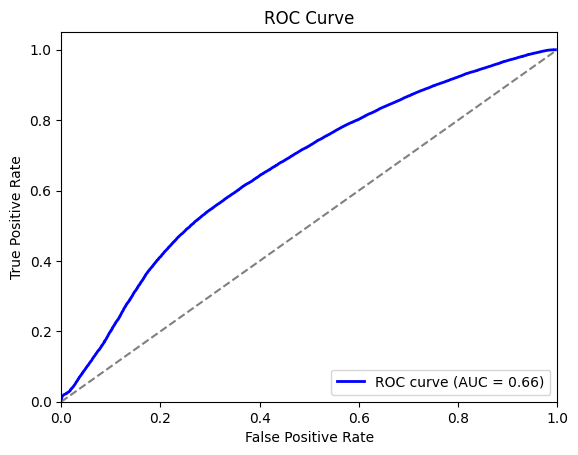

AUC: 0.66


In [33]:
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y, predicted_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print(f"AUC: {roc_auc:.2f}")
